In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
PATH = os.getcwd()
data_path = PATH + '/drive/My Drive/Notebooks/IEEE_Fraud_Detection/data'

In [0]:
transaction_train = pd.read_csv(data_path + '/train_transaction.csv')
transaction_test = pd.read_csv(data_path + '/test_transaction.csv')
identity_train = pd.read_csv(data_path + '/train_identity.csv')
identity_test = pd.read_csv(data_path + '/test_identity.csv')

In [0]:
train = pd.merge(transaction_train, identity_train, on= 'TransactionID', how = 'left')
test = pd.merge(transaction_test, identity_test, on = 'TransactionID', how = 'left')

### Null Values in Dataset

In [0]:
columns_with_null = train.columns[train.isnull().any()].tolist()
len(columns_with_null)

414

In [0]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

In [0]:
missing_value_df.head()

,column_name,percent_missing
TransactionID,TransactionID,0.0
isFraud,isFraud,0.0
TransactionDT,TransactionDT,0.0
TransactionAmt,TransactionAmt,0.0
ProductCD,ProductCD,0.0


### Distribution of Classes

Text(0.5, 1.0, 'Not Fraud vs Fraud')

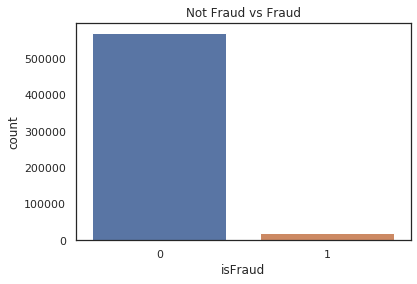

In [0]:
sns.set(style = 'white')
sns.countplot('isFraud', data = train)
plt.title('Not Fraud vs Fraud')

In [0]:
print('Non Fraudulent Transactions', round(train['isFraud'].value_counts()[0]/len(train)* 100, 2), '% of the dataset')
print('Fraudulent Transactions', round(train['isFraud'].value_counts()[1]/len(train)* 100, 2), '% of the dataset')

Non Fraudulent Transactions 96.5 % of the dataset
Fraudulent Transactions 3.5 % of the dataset


In [0]:
print('Non Fraudulent Transactions', train['isFraud'].value_counts()[0])
print('Fraudulent Transactions', train['isFraud'].value_counts()[1])

Non Fraudulent Transactions 569877
Fraudulent Transactions 20663


### Transaction Amount and Transaction Dates and ProductCD

Text(0.5, 1.0, 'ProductCD vs Fraud or Not Fraud')

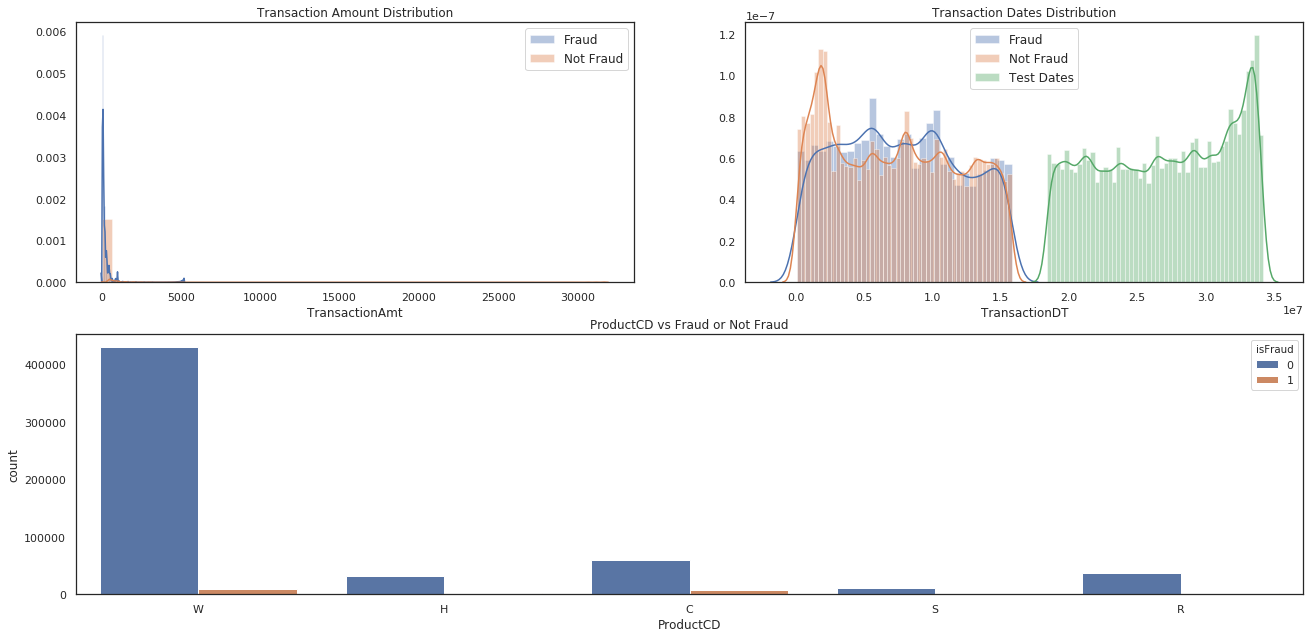

In [0]:
frauds = train[train['isFraud'] == 1]
not_frauds = train[train['isFraud'] == 0]

plt.figure(figsize = (22,22))

# Transaction Amount Distribution
plt.subplot(421)
sns.distplot(frauds.TransactionAmt, label = 'Fraud')
sns.distplot(not_frauds.TransactionAmt, label = 'Not Fraud')
plt.legend(prop={'size': 12})
plt.title('Transaction Amount Distribution')


plt.subplot(422)
sns.distplot(frauds.TransactionDT, label = 'Fraud')
sns.distplot(not_frauds.TransactionDT, label = 'Not Fraud')
sns.distplot(test.TransactionDT, label = 'Test Dates')
plt.legend(prop={'size': 12})
plt.title('Transaction Dates Distribution')

plt.subplot(412)
sns.countplot(x = 'ProductCD', hue = 'isFraud', data = train)
plt.title('ProductCD vs Fraud or Not Fraud')


### Looking at Card Columns

Text(0.5, 1.0, 'Card Type vs Fraudulent or Not')

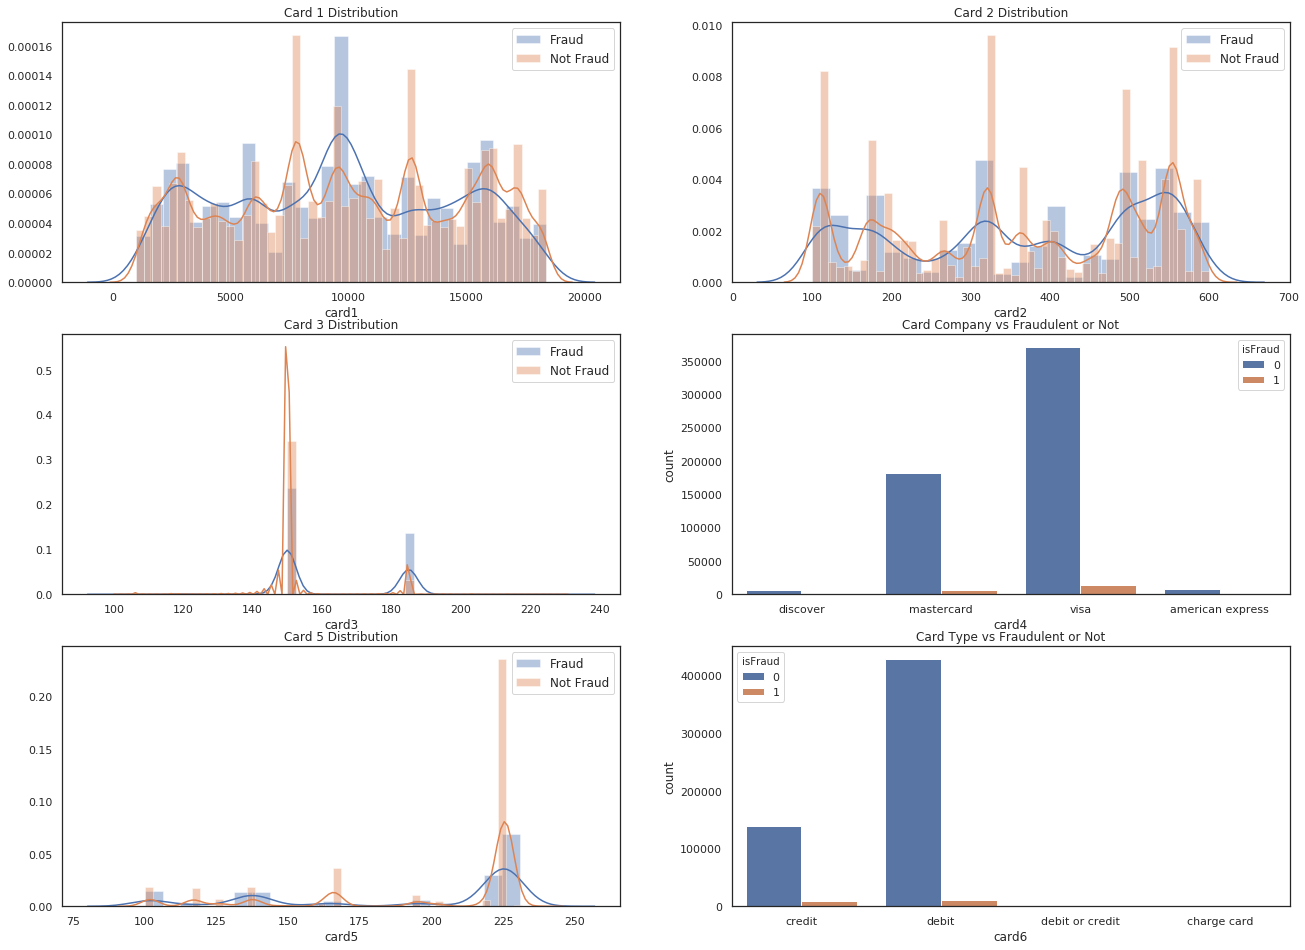

In [0]:
plt.figure(figsize = (22,22))

# Transaction Amount Distribution
plt.subplot(421)
sns.distplot(frauds.card1, label = 'Fraud')
sns.distplot(not_frauds.card1, label = 'Not Fraud')
plt.legend(prop={'size': 12})
plt.title('Card 1 Distribution')


plt.subplot(422)
sns.distplot(frauds.card2.dropna(), label = 'Fraud')
sns.distplot(not_frauds.card2.dropna(), label = 'Not Fraud')
plt.legend(prop={'size': 12})
plt.title('Card 2 Distribution')

plt.subplot(423)
sns.distplot(frauds.card3.dropna(), label = 'Fraud')
sns.distplot(not_frauds.card3.dropna(), label = 'Not Fraud')
plt.legend(prop={'size': 12})
plt.title('Card 3 Distribution')

plt.subplot(424)
sns.countplot(x = 'card4', hue = 'isFraud', data = train)
plt.title('Card Company vs Fraudulent or Not')

plt.subplot(425)
sns.distplot(frauds.card5.dropna(), label = 'Fraud')
sns.distplot(not_frauds.card5.dropna(), label = 'Not Fraud')
plt.legend(prop={'size': 12})
plt.title('Card 5 Distribution')

plt.subplot(426)
sns.countplot(x = 'card6', hue = 'isFraud', data = train)
plt.title('Card Type vs Fraudulent or Not')

### Looking at Address Columns

Text(0.5, 1.0, 'Address 2 Distribution')

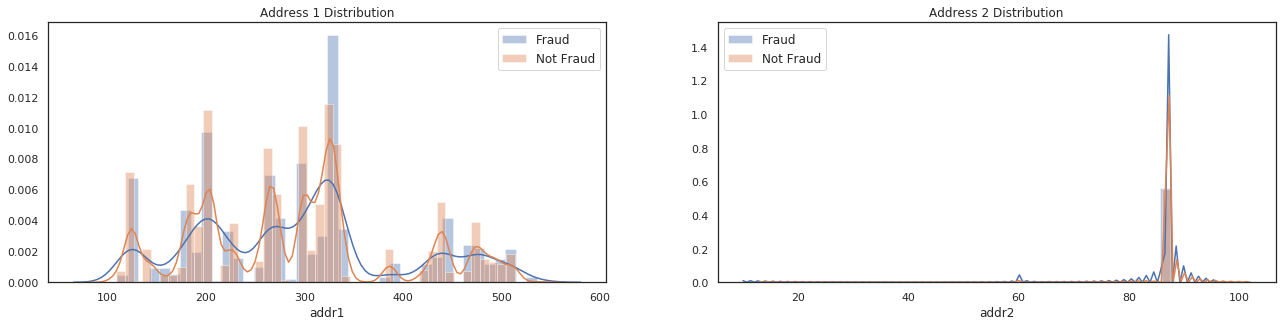

In [0]:
plt.figure(figsize= (22,22))

plt.subplot(421)
sns.distplot(frauds.addr1.dropna(), label = 'Fraud')
sns.distplot(not_frauds.addr1.dropna(), label = 'Not Fraud')
plt.legend(prop={'size': 12})
plt.title('Address 1 Distribution')

plt.subplot(422)
sns.distplot(frauds.addr2.dropna(), label = 'Fraud')
sns.distplot(not_frauds.addr2.dropna(), label = 'Not Fraud')
plt.legend(prop={'size': 12})
plt.title('Address 2 Distribution')

### Looking at Email Domain

Text(0.5, 1.0, 'P Email Domain Fraudulent or Not')

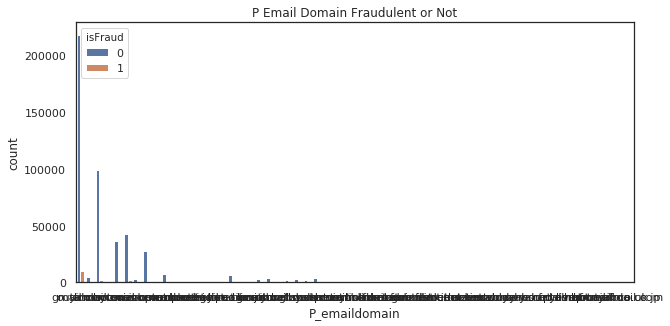

In [0]:
plt.figure(figsize=(22,22))

plt.subplot(424)
sns.countplot(x = 'P_emaildomain', hue = 'isFraud', data = train)
plt.title('P Email Domain Fraudulent or Not')

In [0]:
train.P_emaildomain.unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [0]:
emails = {'gmail.com': 'google', 'outlook.com': 'microsoft', 'yahoo.com': 'yahoo', 'mail.com': 'other',
          'anonymous.com': 'other', 'hotmail.com': 'microsoft', 'verizon.net' : 'other', 'aol.com': 'other', 'me.com': 'apple', 
          'comcast.net': 'other', 'optonline.net': 'other', 'cox.net': 'other', 'charter.net': 'other',
          'rocketmail.com': 'yahoo', 'prodigy.net.mx': 'other', 'embarqmail.com': 'other', 'icloud.com': 'apple',
          'live.com.mx': 'microsoft', 'gmail':'google', 'live.com': 'microsoft', 'att.net': 'yahoo', 'juno.com': 'other',
          'ymail.com' : 'yahoo', 'sbcglobal.net': 'other', 'bellsouth.net': 'other', 'msn.com': 'microsoft', 
          'q.com':'other', 'yahoo.com.mx': 'yahoo', 'centurylink.net': 'other', 'servicios-ta.com': 'other',
          'earthlink.net': 'other', 'hotmail.es': 'microsoft', 'cfl.rr.com': 'other', 'roadrunner.com': 'other',
          'netzero.net': 'other', 'gmx.de': 'other', 'suddenlink.net': 'other', 'frontiernet.net': 'yahoo', 'windstream.net': 'other',
          'frontier.com': 'yahoo', 'outlook.es': 'microsoft', 'mac.com': 'apple', 'netzero.com': 'other', 'aim.com': 'other', 
          'web.de': 'other', 'twc.com': 'other', 'cableone.net': 'other', 'yahoo.fr': 'yahoo', 'yahoo.de':'yahoo', 'yahoo.es': 'yahoo',
          'sc.rr.com': 'other', 'ptd.net': 'other', 'live.fr': 'microsoft', 'yahoo.co.uk': 'yahoo', 'hotmail.fr':'microsoft', 
          'hotmail.de': 'microsoft', 'hotmail.co.uk': 'microsoft', 'protonmail.com': 'other', 'yahoo.co.jk': 'yahoo'
          } 

train['P_emaildomain'] = train['P_emaildomain'].map(emails)
train['R_emaildomain'] = train['R_emaildomain'].map(emails)

Text(0.5, 1.0, 'R Email Domain Fraudulent or Not')

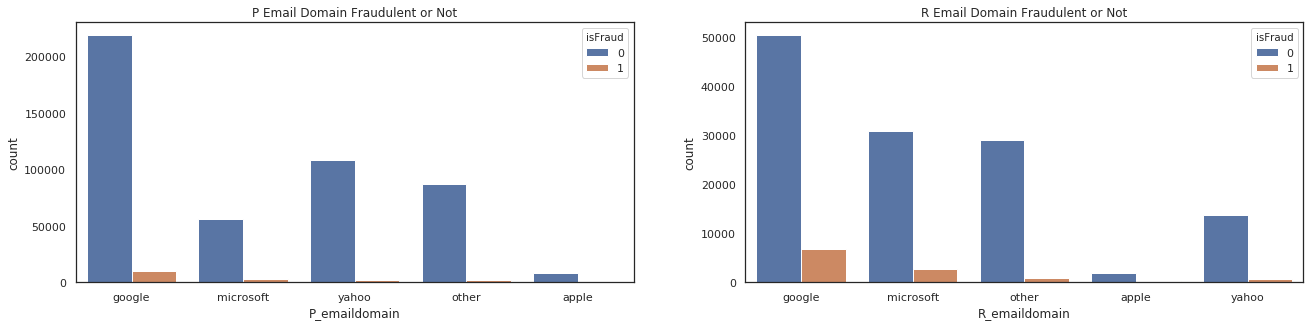

In [0]:
plt.figure(figsize=(22,22))

plt.subplot(421)
sns.countplot(x = 'P_emaildomain', hue = 'isFraud', data = train)
plt.title('P Email Domain Fraudulent or Not')

plt.subplot(422)
sns.countplot(x = 'R_emaildomain', hue = 'isFraud', data = train)
plt.title('R Email Domain Fraudulent or Not')

### Device Information

In [0]:
train.DeviceType.unique()

array([nan, 'mobile', 'desktop'], dtype=object)

Text(0.5, 1.0, 'Device Type vs Fraudulent or Not')

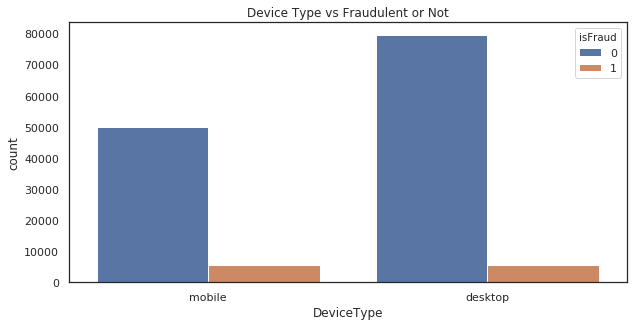

In [0]:
plt.figure(figsize=(22,22))

plt.subplot(421)
sns.countplot(x = 'DeviceType', hue = 'isFraud', data = train)
plt.title('Device Type vs Fraudulent or Not')

### Looking at M1 - M9 Features

Text(0.5, 1.0, 'M9 vs Fraudulent or Not')

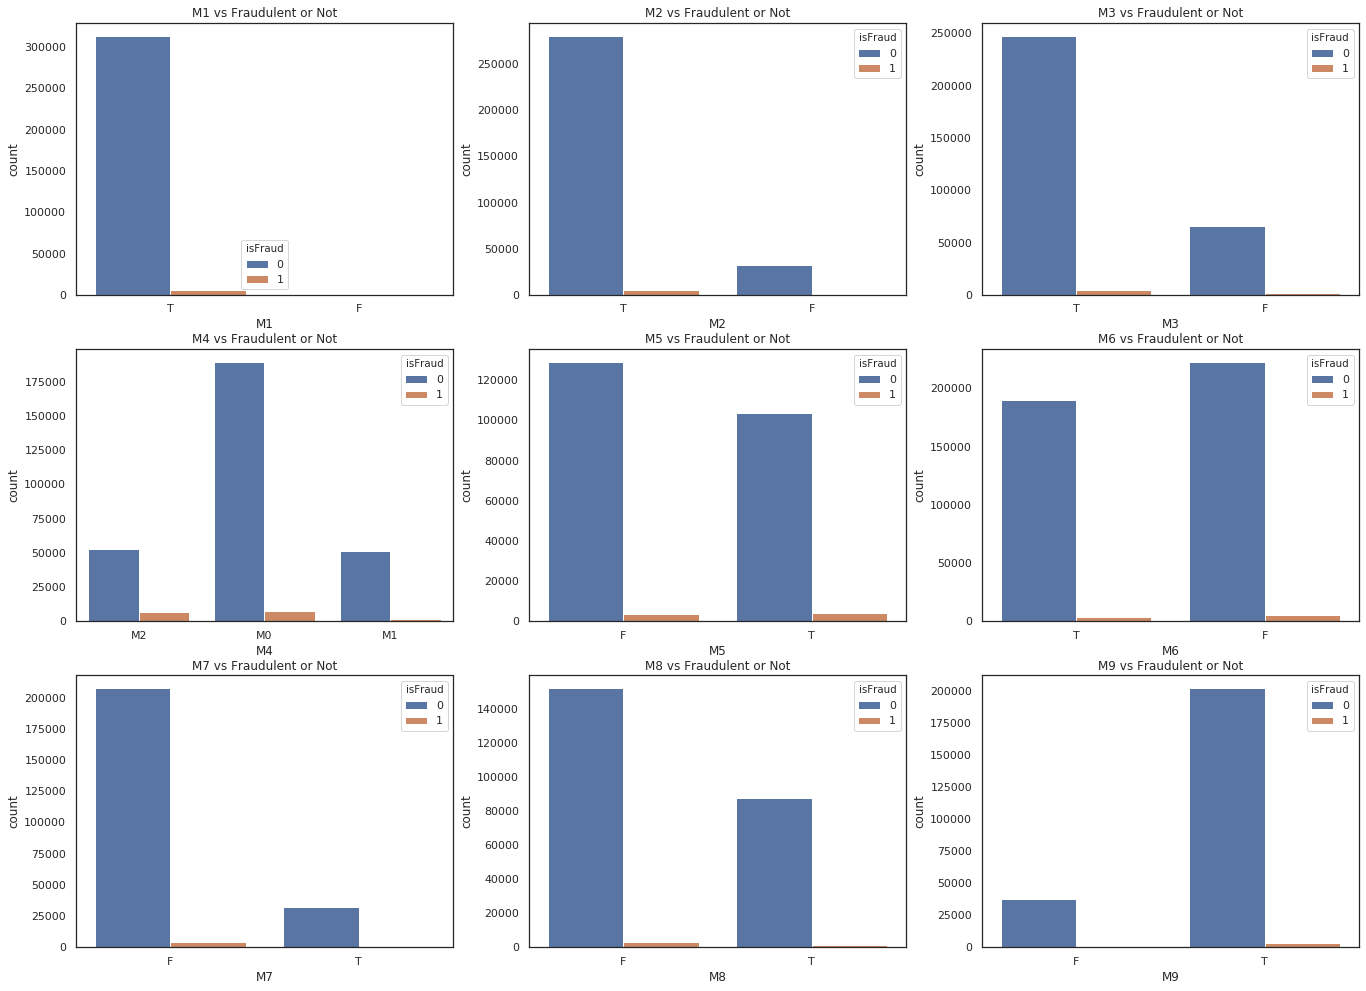

In [0]:
plt.figure(figsize=(23,23))

plt.subplot(431)
sns.countplot(x = 'M1', hue = 'isFraud', data = train)
plt.title('M1 vs Fraudulent or Not')

plt.subplot(432)
sns.countplot(x = 'M2', hue = 'isFraud', data = train)
plt.title('M2 vs Fraudulent or Not')

plt.subplot(433)
sns.countplot(x = 'M3', hue = 'isFraud', data = train)
plt.title('M3 vs Fraudulent or Not')

plt.subplot(434)
sns.countplot(x = 'M4', hue = 'isFraud', data = train)
plt.title('M4 vs Fraudulent or Not')

plt.subplot(435)
sns.countplot(x = 'M5', hue = 'isFraud', data = train)
plt.title('M5 vs Fraudulent or Not')

plt.subplot(436)
sns.countplot(x = 'M6', hue = 'isFraud', data = train)
plt.title('M6 vs Fraudulent or Not')

plt.subplot(437)
sns.countplot(x = 'M7', hue = 'isFraud', data = train)
plt.title('M7 vs Fraudulent or Not')

plt.subplot(438)
sns.countplot(x = 'M8', hue = 'isFraud', data = train)
plt.title('M8 vs Fraudulent or Not')

plt.subplot(439)
sns.countplot(x = 'M9', hue = 'isFraud', data = train)
plt.title('M9 vs Fraudulent or Not')